**IMAGE CLASSIFICATION**

In [0]:
!pip install tensorflow-gpu --upgrade

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
     |████████████████████████████████| 3.8MB 28.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


In [0]:
tf.test.is_gpu_available()

True

In [0]:
tf.__version__

'2.0.0'

In [0]:
!wget http://www.inf.uniroma3.it/db/icr/dataset_icr.zip

--2019-10-25 12:22:28--  http://www.inf.uniroma3.it/db/icr/dataset_icr.zip
Resolving www.inf.uniroma3.it (www.inf.uniroma3.it)... 193.205.219.57
Connecting to www.inf.uniroma3.it (www.inf.uniroma3.it)|193.205.219.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9146769 (8.7M) [application/zip]
Saving to: ‘dataset_icr.zip’

dataset_icr.zip     100%[===================>]   8.72M  3.41MB/s    in 2.6s    

2019-10-25 12:22:32 (3.41 MB/s) - ‘dataset_icr.zip’ saved [9146769/9146769]



In [0]:
! unzip -q dataset_icr.zip

In [0]:
!ls dataset

a  c	d_2  f	h  l  n		o  q  s_1  s_3	u
b  d_1	e    g	i  m  not_char	p  r  s_2  t


In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=5, width_shift_range=0.05, height_shift_range= 0.05 ,
                                                                  rescale = 1.0/255,
                                                                  validation_split=0.2)

In [0]:
train_data_gen  = image_generator.flow_from_directory(directory='dataset', subset ='training', batch_size=32,shuffle=True, target_size=(56,56))

Found 18400 images belonging to 23 classes.


In [0]:
test_data_gen  = image_generator.flow_from_directory(directory='dataset', subset ='validation', batch_size=32,shuffle=False, target_size=(56,56))

Found 4600 images belonging to 23 classes.


In [0]:
import matplotlib.pyplot as plt

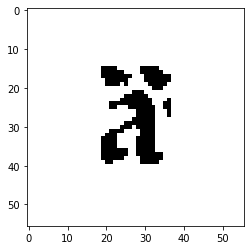

In [0]:
image = plt.imread('./dataset/a/103.png')
plt.imshow(image,cmap='gray')

In [0]:
image.shape

(56, 56)

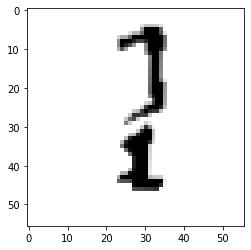

In [0]:
xbatch ,ybatch = next(train_data_gen)
image = xbatch[0]
plt.imshow(image)

In [0]:
ybatch[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
class_dictionary = train_data_gen.class_indices
label = list(class_dictionary.keys())[np.argmax(ybatch[0])]

In [0]:
print(label)

i


In [0]:
xbatch.shape

(32, 56, 56, 3)

In [0]:
from tensorflow.keras import applications
vgg = applications.vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 46s 0us/step


In [0]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
vgg = applications.vgg16.VGG16(weights='imagenet', include_top = False , input_shape=[56,56,3])

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 56, 56, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0     

In [0]:
for layer in vgg.layers:
  layer.trainable

In [0]:
def build_model():
  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(23,activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 23)                11799     
Total params: 14,726,487
Trainable params: 14,726,487
Non-trainable params: 0
_________________________________________________________________


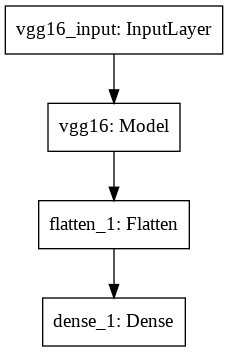

In [0]:
tf.keras.utils.plot_model(model)

In [0]:
history = model.fit_generator(train_data_gen, epochs=10,shuffle=True)

Epoch 1/10
575/575 [==============================] - 85s 148ms/step - loss: 3.1499 - accuracy: 0.0418
Epoch 2/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0402
Epoch 3/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1358 - accuracy: 0.0400
Epoch 4/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0387
Epoch 5/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0419
Epoch 6/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0389
Epoch 7/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0381
Epoch 8/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0410
Epoch 9/10
575/575 [==============================] - 81s 141ms/step - loss: 3.1359 - accuracy: 0.0395
Epoch 10/10
575/575 [==============================] - 81s 142ms/step - l

Text(0, 0.5, 'accuracy')

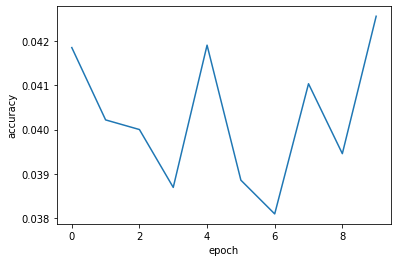

In [0]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [0]:
model.fit(test_data_gen)

Train for 144 steps
144/144 [==============================] - 21s 148ms/step - loss: 3.1432 - accuracy: 0.0209


In [0]:
model1 = build_model()

In [0]:
from tensorflow.keras import callbacks
checkpoint_callbacks = callbacks.ModelCheckpoint(filepath='./checkpoints/model-{epoch:02d}.ckpt',
                                                 save_weights_only = True ,
                                                 save_freq = 'epoch',
                                                 verbose = 1)

In [0]:
model1.fit_generator(train_data_gen, epochs=5, shuffle=True, callbacks=[checkpoint_callbacks])

 79/575 [===>..........................] - ETA: 1:10 - loss: 3.1357 - accuracy: 0.0423

KeyboardInterrupt: ignored

In [0]:
!ls ./checkpoints/

checkpoint
model-01.ckpt.data-00000-of-00002
model-01.ckpt.data-00001-of-00002
model-01.ckpt.index
model-02.ckpt.data-00000-of-00002
model-02.ckpt.data-00001-of-00002
model-02.ckpt.index
model-03.ckpt_temp_fd04fdb5babe43c6b3fc9c848439a9c5


In [0]:
latest = tf.train.latest_checkpoint('./checkpoints')

In [0]:
print(latest)

./checkpoints/model-02.ckpt


In [0]:
model2 = build_model()
model2.load_weights(latest)

In [0]:
model3 = build_model()


In [0]:
!pip install tensorboard --upgrade

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
#%load_ext tensorboard
%reload_ext tensorboard

In [0]:
logdir = './logs'

In [0]:
%tensorboard --logdir=$logdir

In [0]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,
                                                      update_freq = 'batch')

In [0]:
model3.fit(train_data_gen, epochs=5,
           validation_data = test_data_gen,
           shuffle= True,
           callbacks=[tensorboard_callback,checkpoint_callbacks])

Train for 575 steps, validate for 144 steps
Epoch 1/5
574/575 [============================>.] - ETA: 0s - loss: 3.1359 - accuracy: 0.0402
Epoch 00001: saving model to ./checkpoints/model-01.ckpt
575/575 [==============================] - 117s 203ms/step - loss: 3.1359 - accuracy: 0.0401 - val_loss: 3.1355 - val_accuracy: 0.0435
Epoch 2/5
574/575 [============================>.] - ETA: 0s - loss: 3.1359 - accuracy: 0.0410
Epoch 00002: saving model to ./checkpoints/model-02.ckpt
575/575 [==============================] - 115s 200ms/step - loss: 3.1359 - accuracy: 0.0410 - val_loss: 3.1355 - val_accuracy: 0.0435
Epoch 3/5
574/575 [============================>.] - ETA: 0s - loss: 3.1359 - accuracy: 0.0388
Epoch 00003: saving model to ./checkpoints/model-03.ckpt
575/575 [==============================] - 114s 199ms/step - loss: 3.1359 - accuracy: 0.0389 - val_loss: 3.1355 - val_accuracy: 0.0435
Epoch 4/5
574/575 [============================>.] - ETA: 0s - loss: 3.1359 - accuracy: 0.0419


In [0]:
%tensorboard --logdir logs/fit

In [0]:
%tensorboard --logdir logs/gradient_tape

In [0]:
!rm -r ./logs/*

In [0]:
from tensorflow.keras import models,layers

In [0]:
shinked_vgg = models.Sequential([layers.InputLayer(input_shape=[56,56,3]),
                                 *vgg.layers[0:6],
                                 layers.MaxPool2D(pool_size=[5,5]),
                                 layers.Flatten(),
                                 layers.Dense(23,activation='softmax')])

In [0]:
shinked_vgg.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 128)        

In [0]:
shinked_vgg.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [0]:
history = shinked_vgg.fit(train_data_gen, epochs=10, shuffle=True, validation_data= test_data_gen, callbacks=[tensorboard_callback, checkpoint_callbacks])

Train for 575 steps, validate for 144 steps
Epoch 1/10
573/575 [============================>.] - ETA: 0s - loss: 0.8987 - accuracy: 0.7646
Epoch 00001: saving model to ./checkpoints/model-01.ckpt
575/575 [==============================] - 60s 104ms/step - loss: 0.8973 - accuracy: 0.7649 - val_loss: 0.3823 - val_accuracy: 0.8876
Epoch 2/10
573/575 [============================>.] - ETA: 0s - loss: 0.2904 - accuracy: 0.9140
Epoch 00002: saving model to ./checkpoints/model-02.ckpt
575/575 [==============================] - 59s 102ms/step - loss: 0.2901 - accuracy: 0.9141 - val_loss: 0.2605 - val_accuracy: 0.9217
Epoch 3/10
574/575 [============================>.] - ETA: 0s - loss: 0.2214 - accuracy: 0.9300
Epoch 00003: saving model to ./checkpoints/model-03.ckpt
575/575 [==============================] - 59s 103ms/step - loss: 0.2216 - accuracy: 0.9301 - val_loss: 0.2535 - val_accuracy: 0.9265
Epoch 4/10
574/575 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9440

KeyboardInterrupt: ignored